In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import regression as reg
from scipy import stats
from matplotlib import pyplot as plt
import pickle
import netpixi
from netpixi.integration.gt import *
from regression.integration.gt import *
from graph_tool import centrality

In [324]:
metrics = pd.read_csv("metricas.csv")

In [325]:
metrics

,Unnamed: 0,Symbol,1Y Return,1Y Volatility,1Y Sharpe,betweenness,clustering,coreness,Antifragile
0,0,AADR,-0.251947,0.250346,-1.006395,0.000000e+00,1.000000,0.000000,3.994467
1,1,AAXJ,-0.337440,0.232847,-1.449193,1.561412e-03,0.984460,0.032114,4.294664
2,2,ACIO,-0.060124,0.148824,-0.403993,2.091486e-04,0.937659,0.000000,6.719324
3,3,ACSI,-0.148065,0.238942,-0.619667,0.000000e+00,0.000000,0.000000,4.185110
4,4,ACTV,-0.181677,0.242953,-0.747787,1.147261e-07,0.999790,0.094315,4.116024
...,...,...,...,...,...,...,...,...,...
1436,1436,YLD,-0.091160,0.082317,-1.107423,2.775901e-03,0.996104,0.102611,12.148164
1437,1437,YLDE,-0.082411,0.187182,-0.440271,1.050044e-04,0.969227,0.101859,5.342398
1438,1438,YPS,-0.135272,0.230933,-0.585763,1.659611e-04,0.893746,0.728385,4.330265
1439,1439,ZHDG,-0.162616,0.136425,-1.191983,2.620599e-04,0.878619,0.989736,7.330057


In [327]:
metrics["Return"] = metrics["Return"]
metrics["Volatility"] = metrics["1Y Volatility"]
metrics["Sharpe"] = metrics["1Y Sharpe"]


# Analise de Residuos

In [332]:
result = reg.linear(data=metrics, formula='np.exp(Volatility) ~ coreness + Return')
result.micro_summary()

variable,coefficient,std error,p-value
coreness,0.052317,0.015456,0.000731
Return,-0.414284,0.034771,0.000000


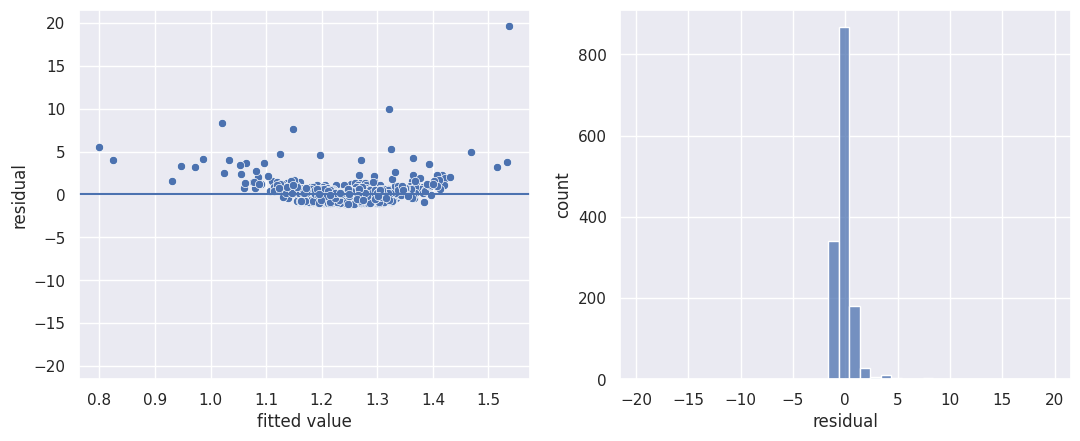

In [333]:
result.plot_residuals()

In [343]:
result = reg.linear(data=metrics, formula='Sharpe ~ coreness')
result.micro_summary()

variable,coefficient,std error,p-value
coreness,0.167383,0.062797,0.007774


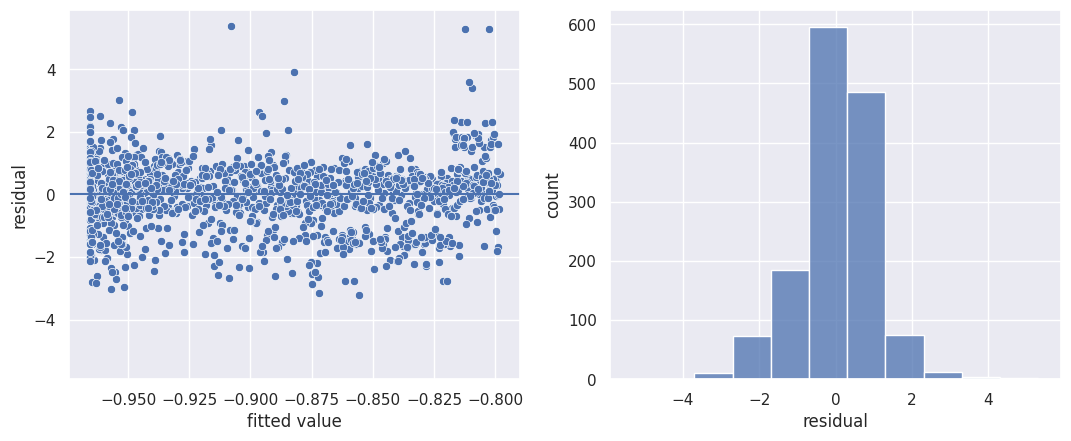

In [344]:
result.plot_residuals()

In [373]:
result = reg.linear(data=metrics, formula='np.exp(Return) ~ clustering')
result.micro_summary()

variable,coefficient,std error,p-value
clustering,-0.031573,0.029713,0.288138


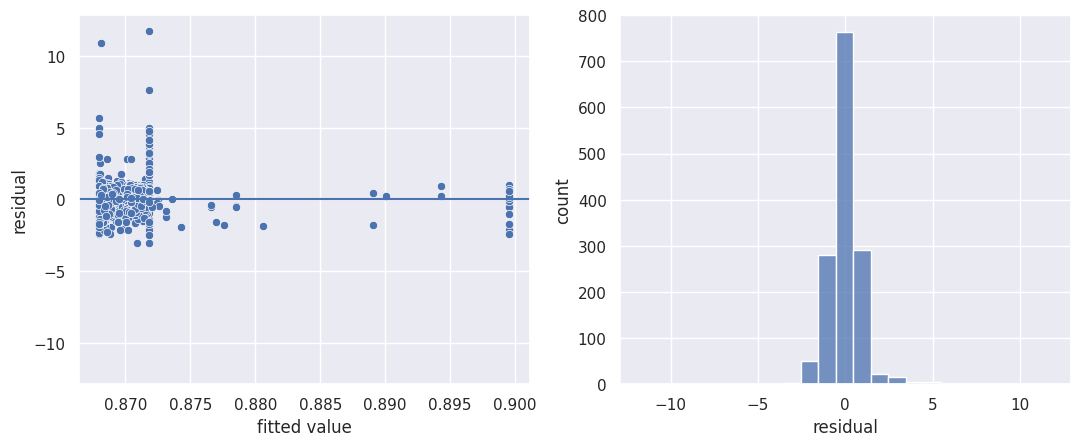

In [374]:
result.plot_residuals()

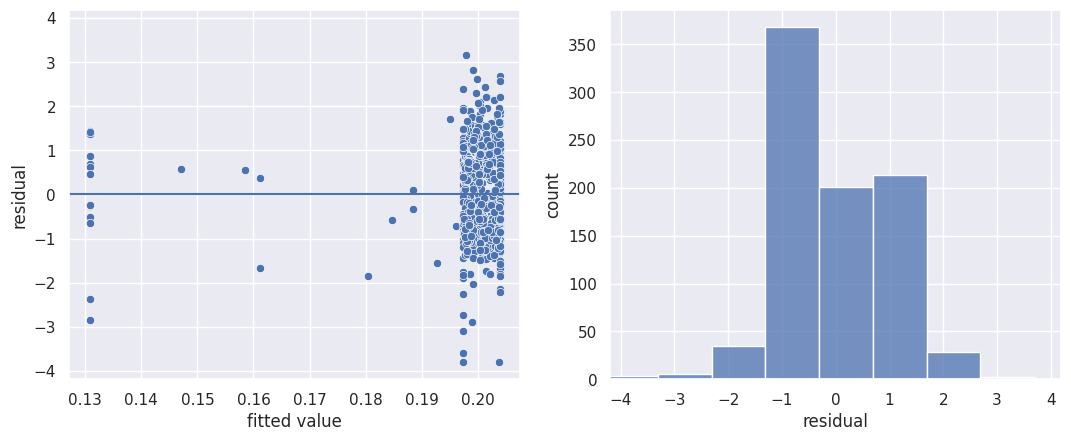

In [323]:
result.plot_residuals()

# Centro X Antifragilidade

In [5]:
metrics["coreness"].describe()

count    1441.000000
mean        0.382450
std         0.328589
min         0.000000
25%         0.067358
50%         0.321525
75%         0.679262
max         1.000000
Name: coreness, dtype: float64

<AxesSubplot: >

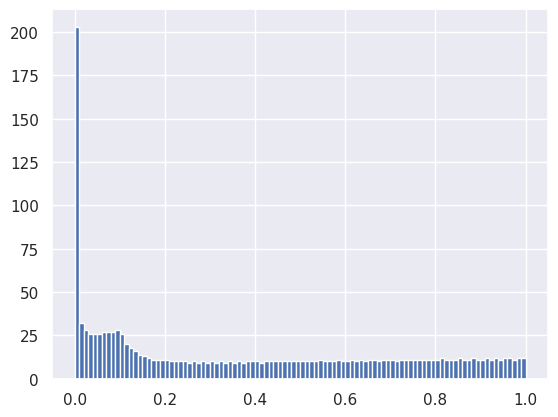

In [6]:
metrics["coreness"].hist(bins=100)

In [13]:
result = stats.linregress(x=metrics['coreness'], y=metrics['1Y Volatility'])

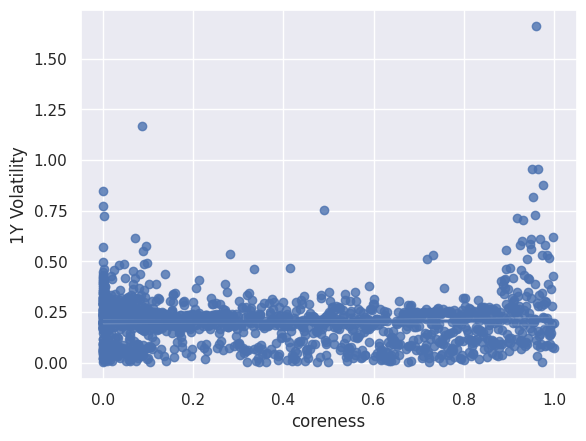

In [14]:
sns.regplot(x=metrics['coreness'], y=metrics['1Y Volatility']);

In [15]:
result.pvalue

0.8328860101744462

In [16]:
result

LinregressResult(slope=0.0021244680518953092, intercept=0.20341555078654866, rvalue=0.005563235890645498, pvalue=0.8328860101744462, stderr=0.010066664891097386, intercept_stderr=0.005075074506314441)

# Intermediário X Antifragilidade

In [17]:
metrics["betweenness"].describe()

count    1441.000000
mean        0.000210
std         0.000432
min         0.000000
25%         0.000018
50%         0.000126
75%         0.000228
max         0.006927
Name: betweenness, dtype: float64

<AxesSubplot: >

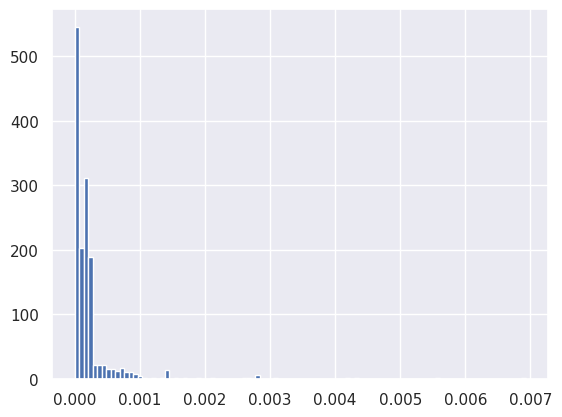

In [18]:
metrics["betweenness"].hist(bins=100)

In [19]:
test = metrics[metrics["betweenness"] <  metrics["betweenness"].mean() + metrics["betweenness"].std()]

In [20]:
result = stats.linregress(x=test['betweenness'], y=np.log(test['Antifragile']))

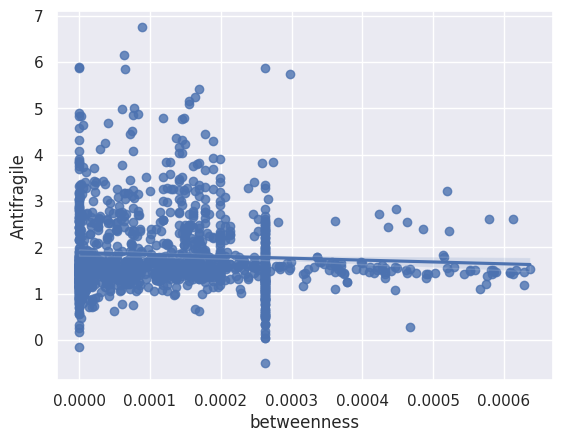

In [21]:
sns.regplot(x=test['betweenness'], y=np.log(test['Antifragile']));

In [22]:
result.pvalue

0.026990795658410133

In [23]:
result

LinregressResult(slope=-401.0103939093004, intercept=1.885266109935337, rvalue=-0.06023932533600369, pvalue=0.026990795658410133, stderr=181.11882341805494, intercept_stderr=0.032736672733554545)

# Similaridade X Rentabilidade

Fundos similares compartilham ativos com outros e provavelmente não possuem uma estratégia muito única. Devido à isso, tendem a seguir grandes players do mercado, sem alterar de maneira significativa essas estratégias, gerando um risco menor, mas reduzindo a possibilidade de um alto retorno.

In [24]:
metrics["clustering"].describe()

count    1441.000000
mean        0.920052
std         0.123207
min         0.000000
25%         0.893746
50%         0.928754
75%         0.980957
max         1.000000
Name: clustering, dtype: float64

<AxesSubplot: >

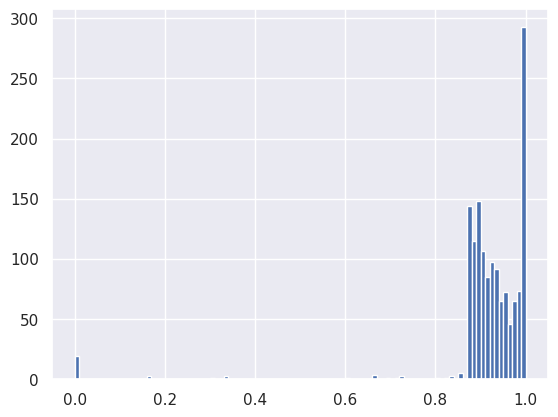

In [25]:
metrics["clustering"].hist(bins=100)

In [26]:
test = metrics[metrics["clustering"] > metrics["clustering"].mean() - metrics["clustering"].std()]

In [27]:
result = stats.linregress(x=test['clustering'], y=test['1Y Return'])

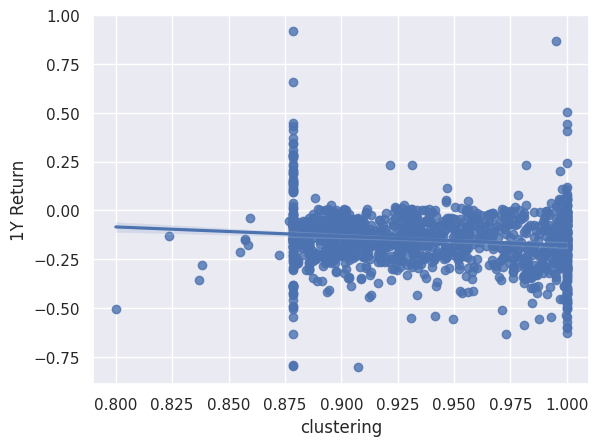

In [28]:
sns.regplot(x=test['clustering'], y=test['1Y Return']);

In [29]:
result.pvalue

8.44246631780537e-08

In [30]:
result

LinregressResult(slope=-0.46800151609069335, intercept=0.2893623834249627, rvalue=-0.1421257623461291, pvalue=8.44246631780537e-08, stderr=0.08689527879181033, intercept_stderr=0.08143689264508137)

# Rentabilidade X Antifragilidade

In [165]:
result = stats.linregress(x=metrics['1Y Return'], y=metrics['1Y Volatility'])

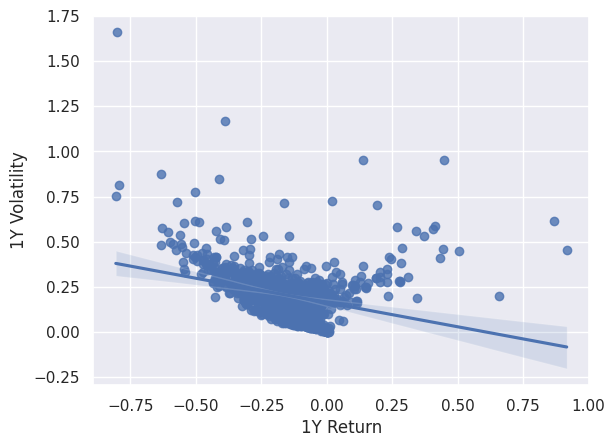

In [166]:
sns.regplot(x=metrics['1Y Return'], y=metrics['1Y Volatility']);

In [167]:
result.pvalue

4.804477573368827e-34

In [168]:
result

LinregressResult(slope=-0.26860751212902045, intercept=0.1640070782952377, rvalue=-0.31265496029305284, pvalue=4.804477573368827e-34, stderr=0.021512214899699914, intercept_stderr=0.00449907136005348)